# CNN Multivariate

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from keras.backend import sigmoid
from keras.models import Sequential
from keras import models, layers, backend, optimizers
from keras.layers import Dropout, BatchNormalization, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import time
from math import sqrt

Using TensorFlow backend.


In [3]:
# read the dataframe and assign the time column as the index values of the dataframe
file = "./DATA/Merged.csv"
df = pd.read_csv(file, index_col='Date', parse_dates=True)
df

,AUD,EUR,NZD,GBP,BRL,CAD,CNY,DKK,HKD,INR,...,CHF,TWD,THB,VEB,gdpGBP,gdpUSD,GBR_Value,USA_Value,liborGBP,liborUSD
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,0.5592,0.9465,0.4432,1.4977,1.9380,1.4963,8.2779,7.8845,7.8000,46.74,...,1.6075,33.000,43.79,0.7008,99.977643,100.815277,-1.815904,-4.084297,5.81094,6.65125
2001-01-03,0.5635,0.9473,0.4463,1.5045,1.9460,1.4982,8.2773,7.8750,7.8000,46.75,...,1.6025,33.078,43.70,0.7002,99.980866,100.807191,-1.824859,-4.076654,6.09750,6.65375
2001-01-04,0.5655,0.9448,0.4457,1.4930,1.9380,1.4985,8.2781,7.8991,7.7998,46.78,...,1.6115,33.000,43.53,0.6994,99.984089,100.799105,-1.833815,-4.069010,5.57125,6.09625
2001-01-05,0.5712,0.9535,0.4518,1.4990,1.9530,1.5003,8.2775,7.8260,7.7993,46.76,...,1.6025,32.927,43.26,0.6988,99.987312,100.791019,-1.842770,-4.061367,5.37813,6.01625
2001-01-08,0.5660,0.9486,0.4505,1.4969,1.9540,1.4944,8.2778,7.8705,7.7998,46.73,...,1.6076,32.850,42.95,0.6990,99.990535,100.782933,-1.851726,-4.053723,5.50000,6.01500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17,0.7211,1.1869,0.6547,1.3105,5.4734,1.3202,6.9318,6.2727,7.7503,74.74,...,0.9058,29.380,31.15,293920.7455,79.588906,90.264283,-3.837938,-2.068833,0.05088,0.08475
2020-08-18,0.7235,1.1928,0.6588,1.3228,5.4845,1.3181,6.9215,6.2406,7.7501,74.62,...,0.9029,29.390,31.16,289550.7506,79.588906,90.264283,-3.837938,-2.068833,0.04838,0.08363
2020-08-19,0.7234,1.1898,0.6607,1.3191,5.5045,1.3173,6.9192,6.2580,7.7500,74.85,...,0.9114,29.370,31.25,291796.8124,79.588906,90.264283,-3.837938,-2.068833,0.04925,0.08463


In [4]:
# extract columns
df.columns

Index(['AUD', 'EUR', 'NZD', 'GBP', 'BRL', 'CAD', 'CNY', 'DKK', 'HKD', 'INR',
       'JPY', 'MYR', 'MXN', 'NOK', 'ZAR', 'SGD', 'KRW', 'LKR', 'SEK', 'CHF',
       'TWD', 'THB', 'VEB', 'gdpGBP', 'gdpUSD', 'GBR_Value', 'USA_Value',
       'liborGBP', 'liborUSD'],
      dtype='object')

In [5]:
# move the response variable to the end of the dataframe
df = df[['AUD', 'EUR', 'NZD', 'BRL', 'CAD', 'CNY', 'DKK', 'HKD', 'INR',
       'JPY', 'MYR', 'MXN', 'NOK', 'ZAR', 'SGD', 'KRW', 'LKR', 'SEK', 'CHF',
       'TWD', 'THB', 'VEB', 'gdpGBP', 'gdpUSD', 'GBR_Value', 'USA_Value',
       'liborGBP', 'liborUSD', 'GBP']]
df.tail()

,AUD,EUR,NZD,BRL,CAD,CNY,DKK,HKD,INR,JPY,...,TWD,THB,VEB,gdpGBP,gdpUSD,GBR_Value,USA_Value,liborGBP,liborUSD,GBP
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-17,0.7211,1.1869,0.6547,5.4734,1.3202,6.9318,6.2727,7.7503,74.74,105.97,...,29.38,31.15,293920.7455,79.588906,90.264283,-3.837938,-2.068833,0.05088,0.08475,1.3105
2020-08-18,0.7235,1.1928,0.6588,5.4845,1.3181,6.9215,6.2406,7.7501,74.62,105.41,...,29.39,31.16,289550.7506,79.588906,90.264283,-3.837938,-2.068833,0.04838,0.08363,1.3228
2020-08-19,0.7234,1.1898,0.6607,5.5045,1.3173,6.9192,6.2580,7.7500,74.85,105.71,...,29.37,31.25,291796.8124,79.588906,90.264283,-3.837938,-2.068833,0.04925,0.08463,1.3191
2020-08-20,0.7178,1.1862,0.6519,5.6370,1.3177,6.9143,6.2783,7.7500,75.01,105.81,...,29.42,31.41,296027.2710,79.588906,90.264283,-3.837938,-2.068833,0.05063,0.08300,1.3190
2020-08-21,0.7156,1.1775,0.6533,5.5949,1.3201,6.9179,6.3235,7.7502,74.92,105.88,...,29.40,31.56,302779.1537,79.588906,90.264283,-3.837938,-2.068833,0.05150,0.08175,1.3098


In [6]:
# scale the multivariate data for the network approximation
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
X = pd.DataFrame(df_scaled, columns=df.columns)

In [7]:
def CreateLaggedSequence(data, lag):
    # make two lists for PredictorSequences and ResponseVariables
    PredictorSequences, ResponseVariables = list(), list()
    for i in range(len(data)):
        # mark the range of the sequence
        end_i = i + lag
        # check when the data ends
        if end_i+1 > len(data):
            # stop sequence creation
            break
        # get the predictors and responses
        PredictorSequence = data[i:end_i]
        ResponseVariable = data[end_i, -1]
        # append them to the lists
        PredictorSequences.append(PredictorSequence)
        ResponseVariables.append(ResponseVariable)
        # print(end_i)
    return np.array(PredictorSequences), np.array(ResponseVariables)

In [8]:
# Define input parameters
NumberOfFeatures = len(df.columns)
lag = 5
# create the lagged values for the series (5 lags)
np_X = np.array(X)
X, y = CreateLaggedSequence(np_X, lag)
# Reshape it for the process
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])
X.shape, y.shape

((4915, 5, 29), (4915,))

In [9]:
# split the train and test sets (last 50 observation spared for the test)
x_train, x_test = X[:-50], X[-50:]
y_train, y_test = y[:-50], y[-50:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4865, 5, 29), (50, 5, 29), (4865,), (50,))

In [10]:
# define new activation function
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [11]:
# create a start point for timer
start = time.time()

# design the model
backend.clear_session()
model = Sequential()

model.add(Conv1D(filters=233, kernel_size=3, padding='same', activation=tf.keras.backend.sin, input_shape=(lag, NumberOfFeatures)))
model.add(Conv1D(filters=233, kernel_size=3, padding='same', activation=tf.keras.backend.sin))

model.add(Flatten())

model.add(layers.Dense(3*2**8, activation=tf.keras.backend.sin, kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(layers.Dense(1, activation='swish'))

# model.add(Conv1D(filters=5, kernel_size=21, padding='same', activation=tf.keras.backend.sin, input_shape=(lag, NumberOfFeatures)))
# model.add(BatchNormalization())
# model.add(Conv1D(filters=21, kernel_size=13, padding='same', activation=tf.keras.backend.sin))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(2))
# model.add(Dropout(0.2))
# model.add(Conv1D(filters=34, kernel_size=5, padding='same', activation=tf.keras.backend.sin))
# model.add(BatchNormalization())
# model.add(Conv1D(filters=89, kernel_size=3, padding='same', activation=tf.keras.backend.sin))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(2))
# model.add(Dropout(0.3))

# model.add(Flatten())

# model.add(layers.Dense(3*2**6, activation =tf.keras.backend.sin, kernel_initializer='he_uniform'))
# model.add(layers.Dense(3*2**6, activation=tf.keras.backend.sin, kernel_initializer='he_uniform'))
# model.add(Dropout(0.25))
# model.add(layers.Dense(3*2**6, activation=tf.keras.backend.sin, kernel_initializer='he_uniform'))
# model.add(Dropout(0.5))

# model.add(layers.Dense(1, activation='swish'))

# compile the model
model.compile(optimizer = optimizers.Adam(lr=0.00011), loss = 'mse', metrics = ['mae'])
#get the summary of the model
model.summary()

################################################################################

# fit the model
history = model.fit(x_train, y_train, 
            epochs = 2**11, 
            batch_size = 3892, 
            validation_split = 0.20,
            verbose = 1, 
            callbacks=[EarlyStopping(monitor='val_mae', patience=2**9, restore_best_weights = True)]) 

#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

# end the timer and print the total time passed
end = time.time()
print("Total time:", end-start, "seconds")

=============] - 0s 55us/step - loss: 0.0012 - mae: 0.0266 - val_loss: 8.5072e-04 - val_mae: 0.0258
Epoch 1909/2048
3892/3892 [==============================] - 0s 59us/step - loss: 0.0012 - mae: 0.0268 - val_loss: 0.0012 - val_mae: 0.0309
Epoch 1910/2048
3892/3892 [==============================] - 0s 56us/step - loss: 0.0012 - mae: 0.0269 - val_loss: 0.0011 - val_mae: 0.0305
Epoch 1911/2048
3892/3892 [==============================] - 0s 55us/step - loss: 0.0011 - mae: 0.0261 - val_loss: 8.2681e-04 - val_mae: 0.0254
Epoch 1912/2048
3892/3892 [==============================] - 0s 58us/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0011 - val_mae: 0.0303
Epoch 1913/2048
3892/3892 [==============================] - 0s 57us/step - loss: 0.0012 - mae: 0.0269 - val_loss: 7.9244e-04 - val_mae: 0.0247
Epoch 1914/2048
3892/3892 [==============================] - 0s 56us/step - loss: 0.0012 - mae: 0.0265 - val_loss: 0.0010 - val_mae: 0.0291
Epoch 1915/2048
3892/3892 [=========================

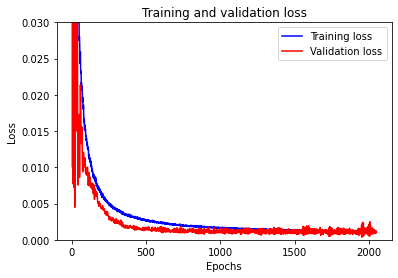

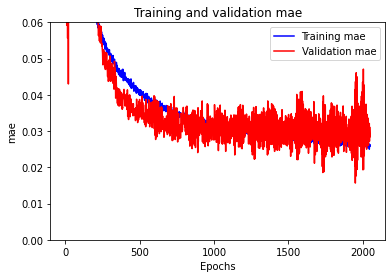

In [12]:
# get the history of the fitting process
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)
# plot the training and validation losses
plt.plot(epochs, loss_values, label = 'Training loss', color='blue')
plt.plot(epochs, val_loss_values, label = 'Validation loss', color='red')
plt.ylim(0,0.03)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plot the training and validation mae (mean absolute error)
plt.plot(epochs, mae_values, label = 'Training mae', color='blue')
plt.plot(epochs, val_mae_values, label = 'Validation mae', color='red')
plt.ylim(0,0.06)
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [13]:
# predict the model on the test set (scaled)
yhat_scaled = model.predict(x_test, verbose=1)

50/50 [==============================] - 0s 791us/step


In [14]:
# insert the scaled predictions into the scaled dataframe
df_scaled[-len(yhat_scaled):] = yhat_scaled
# invert the scaled data (with the predictions) back to real values
df_inverted = scaler.inverse_transform(df_scaled)
# convert the data to dataframe
df_invertedDF = pd.DataFrame(df_inverted, columns=df.columns, index=df.index)

In [15]:
# convert the predictions series
predictions = df_invertedDF.iloc[-len(yhat_scaled):, -1]
# extract the actual values
actuals = df['GBP'][-50:]

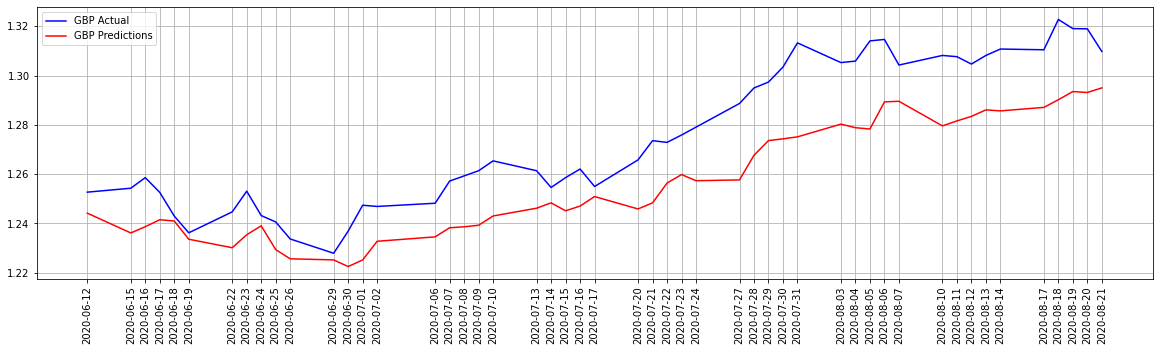

Test RMSE: 0.02076


In [16]:
# evaluate forecasts and plot them together
plt.figure(figsize=(20,5))
plt.plot(actuals.index, actuals, color='blue')
plt.plot(actuals.index, predictions, color='red')
plt.legend(('GBP Actual', 'GBP Predictions'))
plt.xticks(actuals.index, rotation=90)
plt.grid(True)
plt.show()

rmse = sqrt(mean_squared_error(actuals, predictions))
print('Test RMSE: %.5f' % rmse)